# IPython and Media Types

# Built-in IPython display formats

In [1]:
ipython_inst = get_ipython()
format_list = [mediatype for mediatype in ipython_inst.display_formatter.formatters]
display(format_list)

['text/plain',
 'text/html',
 'text/markdown',
 'image/svg+xml',
 'image/png',
 'application/pdf',
 'image/jpeg',
 'text/latex',
 'application/json',
 'application/javascript']

## Use `_repr_*_` methods for built-in media types

In [2]:
from pretty_utils import mpl_image
class Hello:
    hello = "Hello"
    
    def __repr__(self):
        return f"*{self.hello}*"
    
    def __str__(self):
        return f"<strong>{self.hello}</strong>"
    
    def _repr_html_(self):
        return f"{self}"
    
    def _repr_png_(self):
        return mpl_image(self.hello)
    
    def _repr_jpeg_(self):
        return mpl_image(self.hello, format="jpeg")

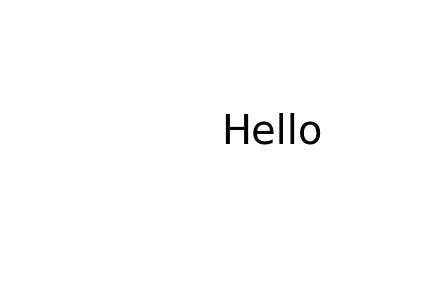

In [3]:
Hello()

## Using `display`

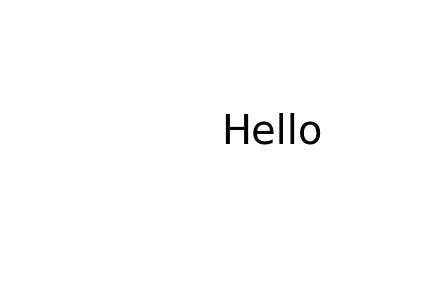

In [4]:
display(Hello())

## Using `display(include=[], exclude=[])`

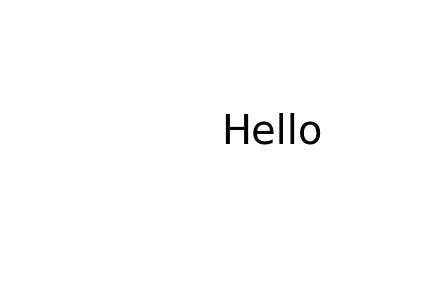

In [5]:
display(Hello(),
        include=["image/png"]
       )

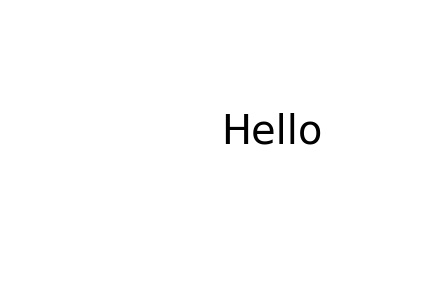

In [6]:
display(Hello(), 
        exclude=["text/html", "image/png"]
       )

## Using `display(metadata={})`

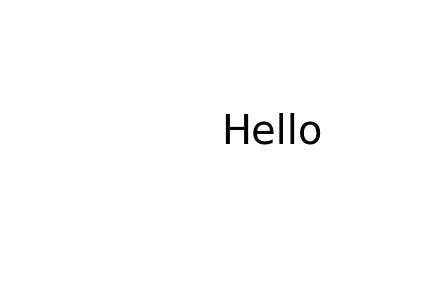

In [7]:
display(Hello(), 
        metadata={"width":"200px"},
        include=["image/png", "image/jpeg"])

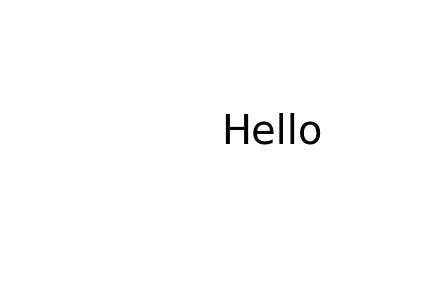

In [8]:
display(Hello(), 
        metadata={"image/png":{ "width": "200px"}},
        include=["image/png", "image/jpeg"]
       )

## Use `_repr_mimebundle_` for arbitrary mediatypes & metadata

In [9]:
from pretty_utils import trans

class Hello:
    hello = "Hello"
    
    def __repr__(self):
        return f"*{self.hello}*"
    
    def __str__(self):
        return f"<strong>{self.hello}</strong>"
    
    def _repr_mimebundle_(self, include=None, exclude=None):
        """Signature should include 'include' and 'exclude'… 
        even if they do nothing with it.
        """
        data = {"application/vdom.v1+json":trans(self.hello).to_dict(),
                **{f"image/{f}":mpl_image(self.hello, f) 
                   for f in ["jpeg", "png"]}
               }
        metadata = {"image/png": {"width":"300px"},
                      "image/jpeg": {"width":"150px"}
                     }
        return data, metadata
    
    def _repr_html_(self):
        return f"{self}"

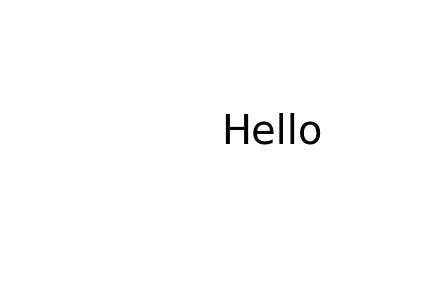

In [10]:
Hello()